In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#---Simulation Parameters --
steps = 200     # Total number of Monte Carlo Steps
x = 0.9         # Initial position (starting far from center)
k = 1.0         # Spring constant (energy scale)
beta = 1.0      # Inverse temperature
delta = 0.05    # Max displacement per step

In [8]:
#--Data Storage--
positions = [x]             #List to store positons over time
energies = [(x - 0.5)**2]   #Energy function: U(x) = (x - 0.5)^2

In [15]:
#---Monte Carlo Loop ---
for step in range(steps):
  x_old = x
  U_old = (x_old - 0.5)**2

  #Step 1: Propose a random move
  dx = np.random.uniform(-delta, delta)
  x_new = x_old + dx

  #Step 2: Check if inside box [0, 1]
  if 0<= x_new <= 1:
      U_new = (x_new - 0.5) ** 2
      delta_U = U_new - U_old

    #Step 3: Metropolis Criterion
  if delta_U < 0 or np.random.rand() < np.exp(-beta * delta_U):
      x = x_new #Accept move
  #else: reject (implicitly do nothing)


In [16]:
#Step 4: Store updated position and energy
positions.append(x)
energies.append((x-0.05)**2)

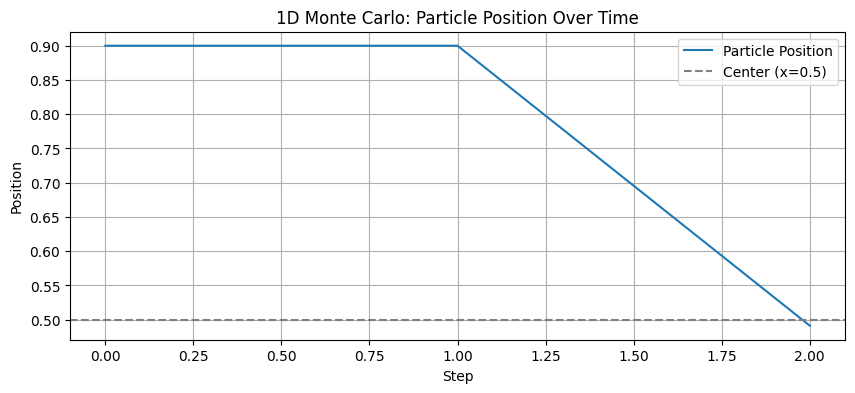

In [17]:
#---Optional Plot --
plt.figure(figsize=(10, 4))
plt.plot(positions, label = 'Particle Position')
plt.axhline(0.5, color='gray', linestyle='--', label='Center (x=0.5)')
plt.xlabel('Step')
plt.ylabel('Position')
plt.title('1D Monte Carlo: Particle Position Over Time')
plt.legend()
plt.grid(True)
plt.show()

Monte Carlo in action — even with totally random trial moves, the physics (via the Metropolis rule) pulls the particle toward lower energy, and in this case, that's the center of the box

Start at x=0.9: high energy
After just a few steps, the particle walks downhill in energy space
Eventually it settles near 0.5, the harmonic minimum

emergent order from randomness — one of the core ideas in statistical mechanics

Random trial moves
Acceptance rule via Boltzmann factor
Natural convergence to low-energy (high-probability) regions
Visual understanding of thermodynamic equilibrium